In [27]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.tree import export_graphviz
from sklearn.metrics import recall_score
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [2]:
df=pd.read_csv('People Charm case.csv')

In [3]:
df.head(5)

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfactoryLevel        14999 non-null float64
lastEvaluation           14999 non-null float64
numberOfProjects         14999 non-null int64
avgMonthlyHours          14999 non-null int64
timeSpent.company        14999 non-null int64
workAccident             14999 non-null int64
left                     14999 non-null int64
promotionInLast5years    14999 non-null int64
dept                     14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Dataset contains 14999 rows and 10 columns, each row has the details of an employee.

2 variables are categorical, remaining columns are of int and float

Checking for any missing values

In [5]:
df.isnull().sum()

satisfactoryLevel        0
lastEvaluation           0
numberOfProjects         0
avgMonthlyHours          0
timeSpent.company        0
workAccident             0
left                     0
promotionInLast5years    0
dept                     0
salary                   0
dtype: int64

In [6]:
df.describe()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
df.drop_duplicates(inplace=True)

In [8]:
# Performing an analysis of the data in order to get insights that will answering the next
# question: Why the people are lefting the company ?
df.groupby( 'left' ).mean()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,promotionInLast5years
left,,,,,,,
0,0.667365,0.715667,3.786800,198.94270,3.262000,0.174500,0.019500
1,0.440271,0.721783,3.883476,208.16223,3.881467,0.052737,0.004018


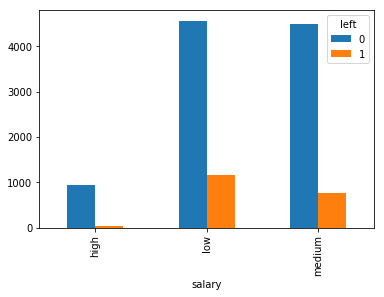

In [9]:
# Comparing the people that decided to left vs the people that still working
# the salary as main field
pd.crosstab( df.salary, df.left ).plot( kind='bar' )

# The next bar chart shows employees with high salaries are likely to not leave the company

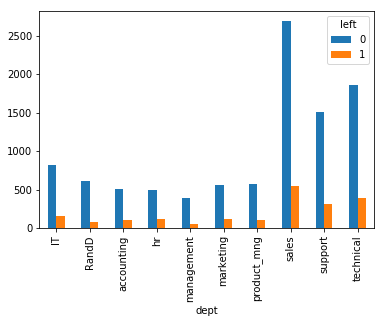

In [10]:
pd.crosstab(df.dept,df.left).plot(kind='bar')

# The next chart there seem to be some impact of department on employee retention

In [11]:
df.columns

Index(['satisfactoryLevel', 'lastEvaluation', 'numberOfProjects',
       'avgMonthlyHours', 'timeSpent.company', 'workAccident', 'left',
       'promotionInLast5years', 'dept', 'salary'],
      dtype='object')

In [12]:
# From the data analysis so far we can conclude that we will use following variables as dependant variables in our model
# **Satisfaction Level**
# **Average Monthly Hours**
# **Promotion Last 5 Years**
# **Salary**

subdf = df[ [ 'satisfactoryLevel','avgMonthlyHours','promotionInLast5years','salary' ] ]

subdf.head()

,satisfactoryLevel,avgMonthlyHours,promotionInLast5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.37,159,0,low
4,0.41,153,0,low


Effect of Employee satisfaction on employee attrition. Lower the satisfaction level higher chances employee leaving

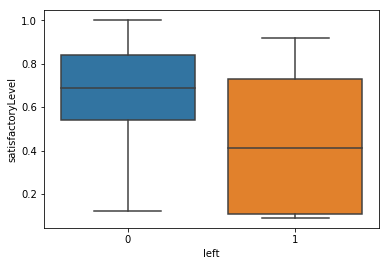

In [13]:
sns.boxplot(x="left", y= "satisfactoryLevel", data=df)
plt.show()

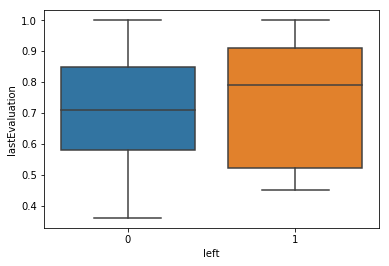

In [14]:
# Effect of last performance evaluation on employee attrition
sns.boxplot(x="left", y= "lastEvaluation", data=df)
plt.show()

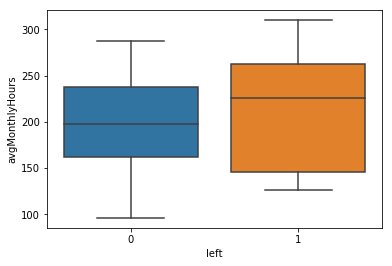

In [15]:
# Do employees putting more hours at work leave compnay?
sns.boxplot(x="left", y= "avgMonthlyHours", data=df)
plt.show()

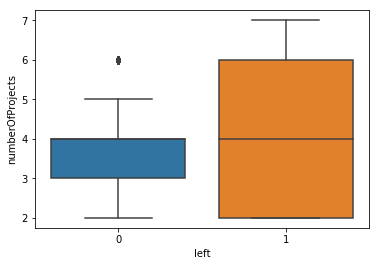

In [16]:
#Do number of projects (frequent changes) cause attrition? Seems people who worked on between 3 to 4 prjects stayed on than people with very less changes or very high changes
sns.boxplot(x="left", y= "numberOfProjects", data=df)
plt.show()

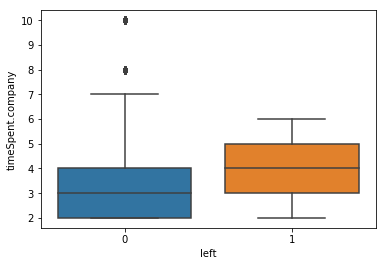

In [17]:
# Does time spent in the company influence person's decision to leave the company?
sns.boxplot(x="left", y="timeSpent.company", data=df)
plt.show()

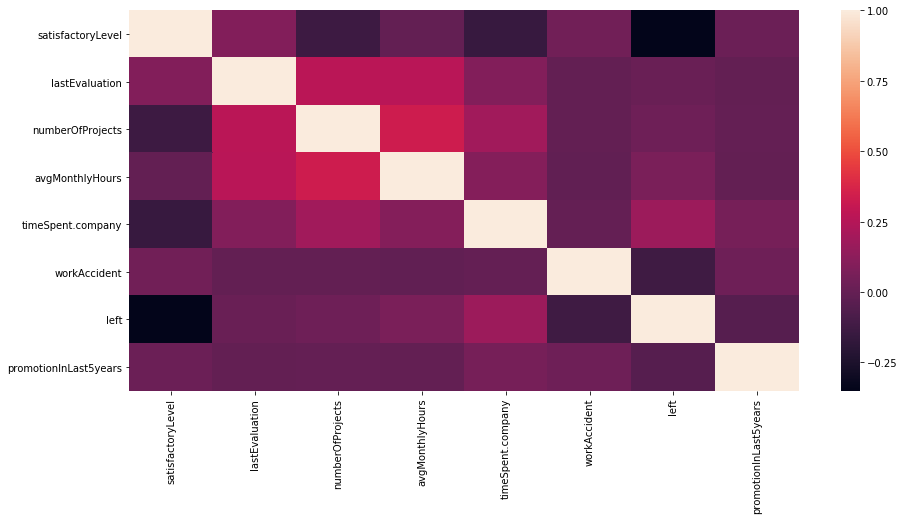

In [18]:
#Correlation Matrix
fig = plt.figure(figsize=(15,7))
cor_mat=df.corr()
sns.heatmap(cor_mat)
plt.show()

In [19]:
df["salary"] =df["salary"].apply(lambda salary: 0 if salary == 'low' else 1)

In [20]:
from sklearn.preprocessing import LabelEncoder
df['dept']=LabelEncoder().fit_transform(df['dept'])

In [21]:
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,7,0
1,0.80,0.86,5,262,6,0,1,0,7,1
2,0.11,0.88,7,272,4,0,1,0,7,1
3,0.37,0.52,2,159,3,0,1,0,7,0
4,0.41,0.50,2,153,3,0,1,0,7,0


In [22]:
df.skew()

satisfactoryLevel       -0.538702
lastEvaluation          -0.031686
numberOfProjects         0.332152
avgMonthlyHours          0.027208
timeSpent.company        1.816577
workAccident             1.914410
left                     1.795135
promotionInLast5years    7.490008
dept                    -0.822811
salary                  -0.085319
dtype: float64

In [23]:
Y = df.left
X = df.drop('left', axis=1)
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

 KNN Classifier

In [24]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
print("KNN Score =", knn.score(x_test,y_test)*100)
prediction = knn.predict(x_test)

KNN Score = 93.87244685285535


In [25]:
cm = confusion_matrix(y_test, prediction)
print("Confusion Matrix is :", cm, sep='\n')

Confusion Matrix is :
[[1913   94]
 [  53  339]]


In [28]:
probs = knn.predict_proba(x_test)
prob_positive = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)
print("Area under the curve is", roc_auc)

Area under the curve is 0.9327284351707799


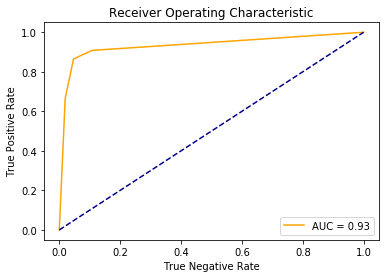

In [29]:
plt.title("Receiver Operating Characteristic")
plt.plot(fpr, tpr, 'orange', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1], color = 'darkblue', linestyle = '--') ##Threshold line
plt.ylabel("True Positive Rate")
plt.xlabel("True Negative Rate")
plt.show()

## Logistic Regression

In [30]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
accuracy = metrics.accuracy_score(y_test,y_pred)
print("Accuracy is ",accuracy)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix is :", cm, sep='\n')

Accuracy is  0.8399333055439766
Confusion Matrix is :
[[1949   58]
 [ 326   66]]


C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Area under the curve is 0.8420680678848519


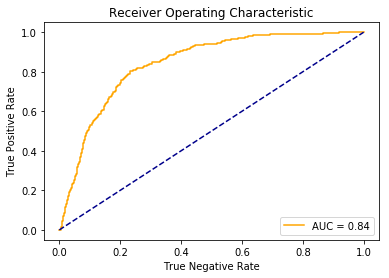

In [31]:
probs_lr = lr.predict_proba(x_test)
prob_positive = probs_lr[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)
print("Area under the curve is", roc_auc)

plt.title("Receiver Operating Characteristic")
plt.plot(fpr, tpr, 'orange', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1], color = 'darkblue', linestyle = '--') ##Threshold line
plt.ylabel("True Positive Rate")
plt.xlabel("True Negative Rate")
plt.show()

In [32]:
## Bernoulli Naive Bayes

In [33]:
bnb = BernoulliNB()
bnb.fit(x_train, y_train)
y_pred = bnb.predict(x_test)
print("Accuracy is", metrics.accuracy_score(y_test, y_pred)*100)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix is :", cm, sep='\n')

Accuracy is 83.65985827428095
Confusion Matrix is :
[[2007    0]
 [ 392    0]]


Area under the curve is 0.8420680678848519


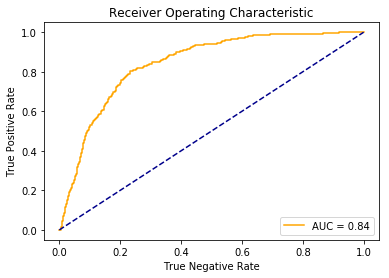

In [34]:
probs_bnb = bnb.predict_proba(x_test)
prob_positive = probs_lr[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)
print("Area under the curve is", roc_auc)

plt.title("Receiver Operating Characteristic")
plt.plot(fpr, tpr, 'orange', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1], color = 'darkblue', linestyle = '--') ##Threshold line
plt.ylabel("True Positive Rate")
plt.xlabel("True Negative Rate")
plt.show()

In [35]:
## Decision Tree Classification 

**Accuracy is NOT enough to evaluate the performance of the metric. For example, in Bernoulli Naive Bayes, the Confusion Matrix is :
[[2007    0]
 [ 392    0]]
This clearly shows that our model is unable to classify actual class 0. Whereas we are getting Accuracy = 83.65985827428095 for this algo, which is good enough. If we don't take a look at confusion matrix, and rely only on accuracy then we will make wrong predictions.**